#Analysing Drug Test Feedback   - Assignment 3 - Report

## Getting Started

### Downloading the repo and getting dataset 

I downloaded the github repository provided on the assignment to get access to drug report dataset. 

Then , got access to medical terminology using the github repo. [Medical Symptom & Disease](https://github.com/sekharvth/symptom-disease) . THe csv file provided list of terminology of symptom and disease which was used analyse major concern mentioned on the Task 4.

In [0]:
!git clone https://github.com/dmollaaliod/itec874-2019.git

In [0]:
%cd /content
!wget https://raw.githubusercontent.com/sekharvth/symptom-disease/master/Dictionary.csv

%cd itec874-2019/assignments
!unzip DrugDest.zip



### Preparing the data

#### Installing necessary package

In [0]:
!pip install autocorrect
!pip install vaderSentiment
import nltk
nltk.download('vader_lexicon')
nltk.download('popular')
!pip install textblob

#### Importing necessary packages 

In [0]:
import glob 
import pandas as pd 
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
#call the nltk downloader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from autocorrect import Speller
# Lemmatize with POS Tag
from nltk.corpus import wordnet



#### Storing the data got from document to dataframe ,for easier text manipulation and analysis.

In [5]:
data_snap = [];
for count , path in enumerate(glob.glob("DrugDest/*.txt")):
  f = open(path, "r")
  text = f.read()
  name = path.split('/')[1]
  datadir = path.split('/')[0]
  new_val = {'filename': name  , 'text':text  , 'word_count':len(text.split())}
  data_snap.append(new_val)
  f.close()
drugDf = pd.DataFrame(data_snap)
drugDf.head()

   

,filename,text,word_count
0,file475.txt.txt,Abidal has taken me out of a deep depression. ...,36
1,file1533.txt.txt,This is a great medication but it does have si...,38
2,file1187.txt.txt,"Whatever you do, make sure that you do NOT for...",32
3,file1591.txt.txt,I've been taking Ecstapin about a year but hav...,93
4,file1851.txt.txt,I have been on Ecstapin for 6 years for anxiet...,274


#### Medication , Dosage and Side Effect


First , we checked individually every document contains medication , sideeffect , and dosagae mentioned on each document.
For that ,  **MedicationConcept.txt** , **SideEffectsConcept.txt**  and **DosageConcept.txt** were
individually used to find out the report containing hint of medication , side effect and dosage use respectively.

In [0]:
def check_medication(columns):
  filename = open('MedicationConcept.txt')
  data = filename.read().splitlines()
  med_data = [i.split(':')[1].lower() for i in data]
  check_medication = [ 'Yes' if any(d in text.lower() for d in med_data) else 'No' for text in columns]
  medication_mention = [[d for d in med_data if d in text.lower()] for text in columns]
  return check_medication , medication_mention
   

In [0]:
def check_side_effect(columns):
  filename = open('SideEffectsConcept.txt')
  data = filename.read().splitlines()
  med_data = [i.split(':')[1].lower().replace('of|the|in' ,'') for i in data]
  check_side_effect = [ 'Yes' if any(all(a in text.lower() for a in d.split())  for d in med_data) else 'No' for text in columns]
  side_effect_mention = [[d for d in med_data if all(a in text.lower() for a in d.split()) ] for text in columns]
  return check_side_effect , side_effect_mention

In [0]:

def check_dosage(columns):
  filename = open('DosageConcept.txt')
  data = filename.read().splitlines()
  med_data = [i.split(':')[1].lower().replace('of|the|in' ,'') for i in data]
  check_dosage = [ 'Yes' if any(re.search(d , text.lower())  for d in med_data) else 'No' for text in columns]
  generic_re = re.compile( '|'.join( med_data) )
  side_dosage = [re.findall(generic_re , text.lower()) for text in columns ]
  return check_dosage , side_dosage

In [0]:
drugDf['has_medication'], drugDf['medication_mention']= check_medication(drugDf['text'].tolist())
drugDf['has_side_effect'] , drugDf['side_effect_mention'] = check_side_effect(drugDf['text'].tolist())
drugDf['has_dosage'] , drugDf['side_dosage'] = check_dosage(drugDf['text'].tolist())
drugDf

### TASK 1  

**Plot a bar chart that shows the number of documents that contain a medication, the number of documents that contain a dosage, and the number of documents that contain a side effect.**

#### How the chart was produced

To help you with this task, below is a list of definitions that can be used in SAS Viya for Learners wer used:
There are individually 3 files that will help to scan concept of the text . 


- DosageConcept.txt :  Text sample text: He obtained Tenactol 10mg and Revinor 25 mg.
- MedicationConcept.txt :  Test sample text: He obtained Tenactol 10mg and Revinor 25 mg.
- SideEffectsConcept.txt : Test sample text: Side effects for Zindol are tiredness, weakness, weight gain, and inappropriate giggling.

We used python package **matplotlib** for plotting the graph for this task with the help of **DataFrame** sturcture provided by **Panda Package**

In [0]:

def plot_bar_graph(label , values , title , ylabel , xlabel = '' , figsize = (8,8)):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.figure(figsize = figsize)

    plt.bar(index, values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(index, label,  rotation=90)
    plt.title(title)
    plt.show()

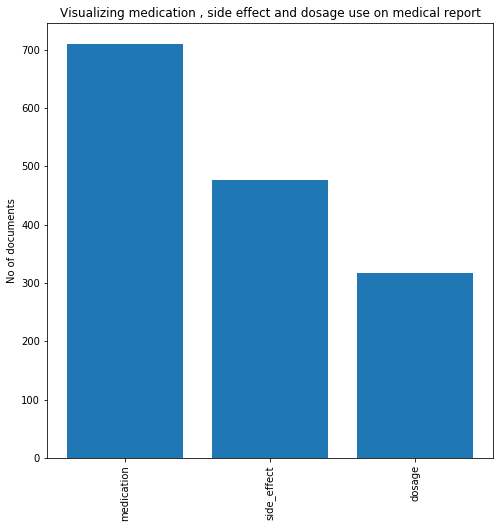

In [11]:
values = [(drugDf[['has_medication']] == 'Yes').sum()[0], 
          (drugDf[['has_side_effect']] == 'Yes').sum()[0] , 
          (drugDf[['has_dosage']]== 'Yes').sum()[0]]

legend = ['medication' , 'side_effect' , 'dosage']
plot_bar_graph(legend , values , 'Visualizing medication , side effect and dosage use on medical report' , 'No of documents')


 #### Explanation of Charts

The cart shows that almost **700** document contains the hint of medication ,  nearly **500** document mention side effect while over **300** document mention dosage use.
Overall , it can be seen that most of the document mention the medication use doage use has comparetely mentioned by only fewer reports.

### Task 2  : Display the counts of number of documents that mention each of the following medications



- Abidal
- Cenerol
- Ecstapin
- Fortifex
- Prexifan


**Choose the appropriate chart or charts to display this information so that it is easy to compare the numbers of documents for each medication.** 

#### How the chart was produced

First , made an array of provided medication , then checked **DataFrame** column to find the how many document mention each medication. Then , finally **matplotlib** was used to plot the bar graph showing each medication count.

In [0]:
def count_medicine(df , med) : 
  found_array = [df.text.str.contains(m).sum() for m in med ]
  return found_array

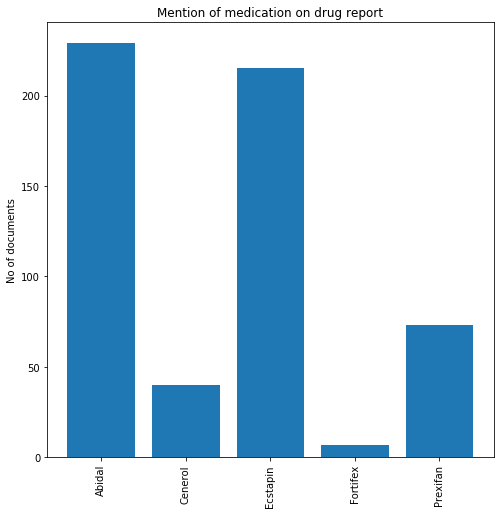

In [13]:
legend = ['Abidal' , 'Cenerol' , 'Ecstapin' , 'Fortifex' , 'Prexifan']
values = count_medicine(drugDf , legend )

plot_bar_graph(legend , values , "Mention of medication on drug report" , "No of documents")


#### Chart Explanation

Overall , most of the document seem to mention medication **Abidal** while only few document mention the medication of **Fortifex**. 

It seems , **Ecstapin** has similar amount mention as **Abidal** medication.

Only below 100 documents mention **Prexifan** and **Cenerol** was mentioned almost by 50 documents to be exact.

### Task 3 : Identify the medications that are associated with sleep issues

**. Your chart or charts should clearly indicate which medications have stronger associations with sleep issues, and they should quantify the degree of association.**

#### How the chart was produced



First all the text from the report was tokenized and converted into base form using **NLTK** package. The **lemmatize** package with **post_tag** provide by **NLTK** was used to simplify the text. Synomyns and antonyms of word **Sleep** was used to find the sleep issue related with each medication. 
For medication related to reprot filename **MedicationConcept.txt** provided on assignment description was used.

**Odd ratio** of sleep related with each medication count and sleep mentioned count , was used to quantify sleep association with each medication.

In [0]:


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [0]:

def filter_and_leamtize_sentences(text):
  """ Tokenize , removes stopwords and lemantize sentence to its base form"""
  # Tokenize: Split the sentence into words
  stop_words=set(stopwords.words("english"))
  word_list = nltk.word_tokenize(text)
  filtered_text = [w for w in word_list if w not in stop_words]
  lem = WordNetLemmatizer()
  lemmatized_output = ' '.join([lem.lemmatize(w ,get_wordnet_pos(w) ) for w in filtered_text ])
  return lemmatized_output

In [0]:
 
def get_word_synonyms_antonyms(word):
  """ Get the synonyms of the word , 
  in this case synonyms of sleep, to check if its interpated on other ways as well."""
  syns = wordnet.synsets(word)
  syn = [a.name() for s in syns for a in s.lemmas()]
  antonym =[ a.antonyms()[0].name() for s in syns for a in s.lemmas() if a.antonyms()]
  word_to_look = syn + antonym 
  unique = np.unique(word_to_look)
  # print(unique)
  return unique

In [0]:
drugDf['cleansed_text'] = [filter_and_leamtize_sentences(w) for w in drugDf['text'].tolist()]
slp_syno = get_word_synonyms_antonyms('sleep')
# mention_of_sleep = [ text.count('sleep') for text in drugDf['cleansed_text'].tolist()]

mention_of_sleep = [[text.count(slp) for slp in slp_syno] for text in drugDf['cleansed_text'].tolist()]
drugDf['sleep_count'] = [sum(ind) for ind in mention_of_sleep]

# drugDf['sleep_count'] = mention_of_sleep


In [0]:
def plot_hor_bar(label , values , title , ylabel , xlabel = '' , figsize = (8,8)):
    # this is for plotting purpose
    index = np.arange(len(label))
    

    fig, ax = plt.subplots(figsize=figsize)


    ax.barh(index , values ,align='center')
    ax.set_yticks(index)
    ax.set_yticklabels(label)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(ylabel)
    ax.set_ylabel(xlabel)
    ax.set_title(title)
    plt.show()
    

/content/itec874-2019/assignments


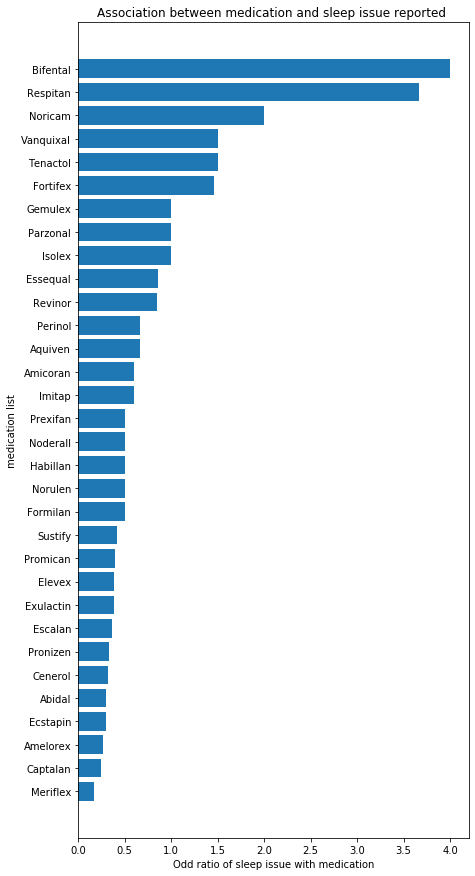

In [20]:
%cd /content/itec874-2019/assignments
filename = open('MedicationConcept.txt')
data = filename.read().splitlines()
med_data = [i.split(':')[1] for i in data]
med_data_count = [sum(x.count(med.lower()) for x in drugDf['medication_mention']) for med in med_data]

filter_df_list = [(drugDf[drugDf.medication_mention.apply(lambda a: med.lower() in a)]) for med in med_data]

med_sleep_count = [sum(l['sleep_count']) for l in  filter_df_list ]

slp_count_sum = sum(drugDf['sleep_count'])


medDf = pd.DataFrame({'medication': med_data , 'med_count':med_data_count ,
                      'sleep_count':med_sleep_count  })
medDf['sleep_issue_prob'] = [row['sleep_count'] / row['med_count'] 
                             if row['med_count'] > 0 else 0 for i, row in medDf.iterrows() ]

medDf = medDf.sort_values(by='sleep_issue_prob' , ascending = False)
eliminate_zero_medDf = medDf[medDf.sleep_issue_prob != 0]
plot_hor_bar(eliminate_zero_medDf['medication'].tolist() ,
               eliminate_zero_medDf['sleep_issue_prob'].tolist(), 
               "Association between medication and sleep issue reported ", 
               "Odd ratio of sleep issue with medication" , xlabel = ' medication list ', figsize=(7,15))



#### Evaluation of the chart.

It seems **Bifental** medication has higher association with the sleep issue while **Meriflex** had less association with sleep issue. 

Other medication which is not mentioned  on the graph has shown no mention of **sleep** issues based on word count.

### Task 4 (5 marks) - What are the most common concerns expressed?

**To complete this task, you need to determine the main concerns expressed in the posts. For this task you are free to use any tools or combination of tools. Make sure that you explain what tools you are using and how, and how to read the charts that you produce.**

#### How the chart was produced

First medical term containing the symptoms and diseases was cloned by using github repo [sekharvth/symptom-disease](https://github.com/sekharvth/symptom-disease). This was used as the base word to evaluate the concerned major on the drug report.

Rather of doing the evaluation on the single document , the evaluation was done by combining all report and analyzed whole report to get major concerns.

Chart was produced  using **panda** plot function provided by **DataFrame** structure.
Among other concerned present on the report only 20 major concerned were used to plot on the bar graph on descending order of mention.

In [0]:
def analyse_concern(term , columns):
  full_text = " ".join(columns.tolist())
  major_concern = [ full_text.count(d) for d in term.tolist() ]
  return major_concern

/content


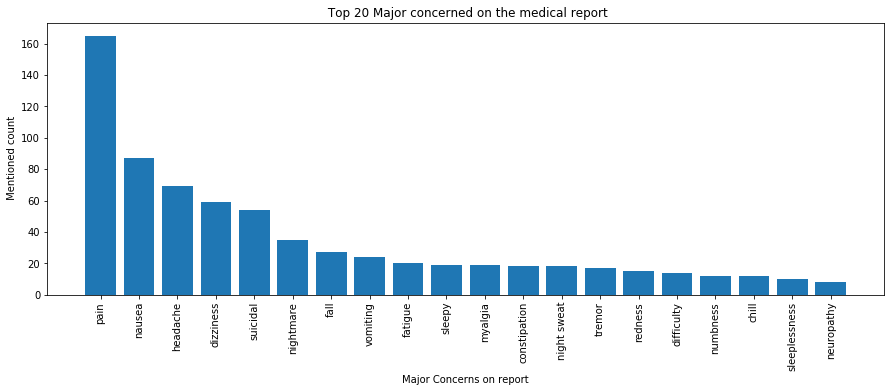

In [22]:
%cd /content
medical_term_DF = pd.read_csv('Dictionary.csv')

medical_term_DF['Values'] = analyse_concern(medical_term_DF['Key'] , drugDf['text'])
# print(medical_term_DF.shape)

medical_term_DF =medical_term_DF[medical_term_DF.Values != 0]
medical_term_DF = medical_term_DF.sort_values(by='Values' , ascending=False)
plot_bar_graph(medical_term_DF['Key'][:20] , medical_term_DF['Values'][:20], " Top 20 Major concerned on the medical report" ,
               ylabel=' Mentioned count' , xlabel='Major Concerns on report' , figsize=(15,5))

#### Evaluation of the Chart

It seems the major concern on the repor is **Pain** followed by **Nausea** , **Headache** , **dizziness** and **suicidal**. But the different on the conern **Pain** is very much higher than other concern. 

Among Top 20 concern **neuropathy** was the least concern on the document.

#### Task 5 (5 marks) - Provide useful additional information.

**This final task is open. Provide additional charts that would help the analyst find additional useful information about drug effects on patients. For this task, in addition to explaining how the charts were produced and how to read them, it is important that you explain how the information is useful.**

#### What was done and How chart was produced

For final task , we used centemental analysis of each document categorizing each report to 3 sentiments , **Positive** , **Negative** and **Neutral** . 

I have used  **VADER** SentimentIntensityAnalyzer class to analyze sentiment associated with each document. 

For each document , the sentiment analyzer gives , postive , negative and composite score. We considered the postive score to consider the sentiment of the report.

Then the chart visaulized the overall no of document containing each kind of sentiment. 

This can be useful to visualize what kind of sentiment is more associated with the drug report.

In [0]:

def sentiment_analysis(doc_lists):
    sentiments_text_array = []
    sent_score_array = []
    comp_score_array = []
    sid = SentimentIntensityAnalyzer()
    for tw in doc_lists:
        
      score = sid.polarity_scores(tw)

      comp_score = score['compound']

      if comp_score > 0.05 :
        txt ="Positive"
      elif(comp_score > -0.05) and (comp_score < 0.05):
        txt = "Neutral"
      else : 
        txt = "Negative"
      sentiments_text_array.append(txt)
      
      comp_score_array.append(comp_score)

      sent_score_array.append(score)
        
    return sentiments_text_array , sent_score_array , comp_score_array

Text(0.5, 1.0, 'Drug Report  Sentiment analysis')

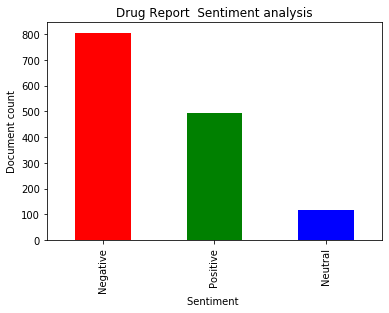

In [24]:

sid = SentimentIntensityAnalyzer()

sentiment_Df = pd.DataFrame()

sentiment_Df['text'] = drugDf['text']

sentiment_Df['sentiment'] , sentiment_Df['sentiment_score'] , sentiment_Df['compound_sentiment'] = sentiment_analysis(sentiment_Df['text'].values)


sentiment_Df.head()


plot = pd.value_counts(sentiment_Df['sentiment']).plot.bar( color=['red', 'green', 'blue'])

plot.set_xlabel("Sentiment ")

plot.set_ylabel("Document count")

plot.set_title("Drug Report  Sentiment analysis")

#### Explanation of the chart 



It seems the major of the sentiment related with the document is **Negative** and least one is **Neutral**. 

It seems around **500** document mention positive sentiment. 

Overall , the medication report seems to have more negative impact/sentiment than postive.